# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [3]:
df.head()

,p1,p2
0,6.964692,7.943428
1,2.861393,5.099537
2,2.268515,0.974429
3,5.513148,4.474359
4,7.194690,8.938402


In [19]:
# a) Média e Diferença
m = np.array([[0.5, 0.5], [0.5, -0.5]])
dados = df[['p1', 'p2']].to_numpy().T
transf = np.matmul(m, dados)

media = transf[0, :]
diferenca = transf[1, :]

print(f'Média:', media)
print(f'Diferença', diferenca)

Média: [7.45405986 3.98046502 1.62147187 4.99375359 8.06654581 3.83203323
 9.8224836  7.38295537 5.25467221 4.79861827 4.17960223 7.82519341
 3.99936809 0.9942103  4.13757855 6.71682133 2.53356683 2.15813583
 5.33825878 5.20172984 5.74485901 8.59407998 7.47877281 5.69465761
 7.80553585 2.68098762 2.55633638 2.80249585 2.73545744 6.24674645
 0.50229104 3.53403035 4.93624632 4.59241648 5.08877915 3.52626632
 4.106134   8.39094043 9.07536919 4.41210519 7.2830862  1.23840457
 3.74795759 3.5145861  8.75360914 3.09348462 4.66283726 9.92779893
 4.65256724 5.44720949]
Diferença [-0.489368   -1.11907167  0.64704266  0.51939411 -0.87185611  0.39903137
 -0.01484162 -0.53465798 -0.4453532  -0.87744309 -0.74782207 -0.53469633
  0.38635436 -0.39743133 -0.157136    0.66313273 -0.70864952 -0.40361827
 -0.02274504  0.11654603  0.59915057 -0.09976204 -0.23421956  0.41557749
 -0.58110202  0.54860152  1.06155018 -0.51986355  0.20168302  0.06301479
  0.41875836  0.80298138 -0.62761869  0.34443449 -0.830476

In [7]:
# b) correlação entre p1 e p2
corr_p1_p2 = np.corrcoef(df['p1'], df['p2'])[0,1]
print('Correlação p1 e p2:', corr_p1_p2)

Correlação p1 e p2: 0.8957365818728046


In [9]:
# c) correlação entre média e diferença
corr_media_diff = np.corrcoef(media, diferenca)[0, 1]
print(corr_media_diff)

-0.13347385411788837


d) comente as correlações observadas

A correlação entre p1 e p2 possui um valor alto, o que significa que p1 e p2 estão bastante relacionadas, ou seja, quando uma aumenta, a outra também aumenta. Já a correlação entre média e diferença apresenta um valor negativo, o que significa que, depois da transformação linear para calcular média e diferença, as novas variáveis tornam-se praticamente descorrelacionadas.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [13]:
# matriz de transformação
m = np.array([[1, 1],
              [1, -1]])

In [14]:
# aplicando a transformação
dados = df[['p1', 'p2']].to_numpy().T
transf = np.matmul(m, dados)
soma = transf[0, :]
diferenca = transf[1, :]

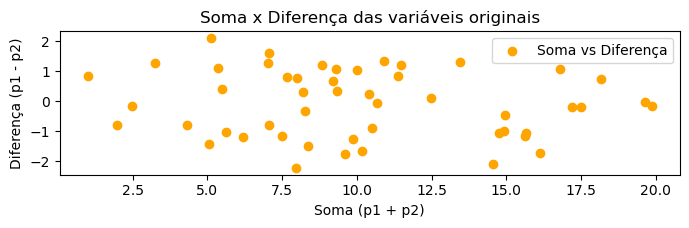

In [18]:
# plotando o gráfico
plt.figure(figsize=(8,6))
plt.scatter(soma, diferenca, c='orange', label='Soma vs Diferença')
plt.xlabel('Soma (p1 + p2)')
plt.ylabel('Diferença (p1 - p2)')
plt.title('Soma x Diferença das variáveis originais')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

- Os pontos estão mais espalhados no eixo horizontal, indicando que a soma de p1 e p2 varia bastante, visto que estão positivamente correlacionados
- Há pouca dispersão no eixo das diferenças, indicando que p1 e p2 costumam ser próximos
- De forma geral, o gráfico mostra o que já foi visto nos cálculos: dados muito correlacionados ficam alinhados principalmente ao longo do eixo da soma, e com pouca dispersão no eixo da diferença.